In [1]:
from __future__ import print_function
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import time
from PIL import Image as pil_image
from tensorflow.keras.preprocessing.image import save_img
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization



start_time = time.time()

batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()



x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1,img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1,img_rows, img_cols)
    input_img = (1,img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_img = (img_rows, img_cols, 1)



x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [2]:


model_2 = Sequential([
    Conv2D(32, kernel_size=(3, 3),
    activation='relu',
    input_shape=input_img , padding = 'same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25), # I removed this layer to showcase the Training and Validation Loss/Accuracy graph in the report
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), # I removed this layer to showcase the Training and Validation Loss/Accuracy graph in the report
    Dense(num_classes, activation='softmax'),
    ], name = 'No Dropout')

model_1 = [model_2]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:
import matplotlib.pyplot as plt

history_dict = {}

for model in model_1:
    model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
    history_dict[model.name] = history


Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 648s 11ms/sample - loss: 0.3714 - acc: 0.8900 - val_loss: 0.1694 - val_acc: 0.9808
Epoch 2/10
60000/60000 [==============================] - 410s 7ms/sample - loss: 0.1049 - acc: 0.9696 - val_loss: 0.0460 - val_acc: 0.9845
Epoch 3/10
60000/60000 [==============================] - 332s 6ms/sample - loss: 0.0723 - acc: 0.9789 - val_loss: 0.0358 - val_acc: 0.9885
Epoch 4/10
60000/60000 [==============================] - 332s 6ms/sample - loss: 0.0573 - acc: 0.9829 - val_loss: 0.0341 - val_acc: 0.9892
Epoch 5/10
60000/60000 [==============================] - 338s 6ms/sample - loss: 0.0460 - acc: 0.9865 - val_loss: 0.0318 - val_acc: 0.9893
Epoch 6/10
60000/60000 [==============================] - 332s 6ms/sample - loss: 0.0392 - acc: 0.9885 - val_loss: 0.0357 - val_acc: 0.9877
Epoch 7/10
60000/60000 [==============================] - 332

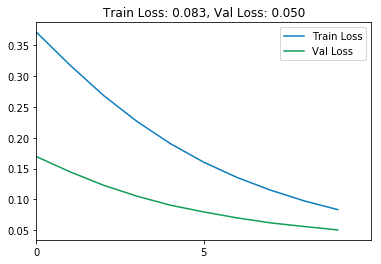

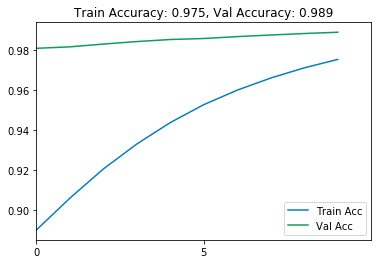

In [4]:
import pickle


def smooth_curve(points, factor=0.8):
    smoothed = []
    for point in points:
        if smoothed:
            previous = smoothed[-1]
            smoothed.append(previous * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed


def plot_compare(history, steps=-1):
    if steps < 0:
        steps = len(history.history['acc'])
    acc = smooth_curve(history.history['acc'][:steps])
    val_acc = smooth_curve(history.history['val_acc'][:steps])
    loss = smooth_curve(history.history['loss'][:steps])
    val_loss = smooth_curve(history.history['val_loss'][:steps])
    
    plt.figure(figsize=(6, 4))
    plt.plot(loss, c='#0c7cba', label='Train Loss')
    plt.plot(val_loss, c='#0f9d58', label='Val Loss')
    plt.xticks(range(0, len(loss), 5))
    plt.xlim(0, len(loss))
    plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
    plt.legend()
    
    plt.figure(figsize=(6, 4))
    plt.plot(acc, c='#0c7cba', label='Train Acc')
    plt.plot(val_acc, c='#0f9d58', label='Val Acc')
    plt.xticks(range(0, len(acc), 5))
    plt.xlim(0, len(acc))
    plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
    plt.legend()


def save_history(history, fn):
    with open(fn, 'wb') as fw:
        pickle.dump(history.history, fw, protocol=2)





model.save('model.h5')
save_history(history, 'history.bin')
plot_compare(history)